# Unsupervised Learning Using K-Means Clustering on California Housing Data

In this assignment, we will work with the California Housing dataset to explore unsupervised learning techniques using K-Means clustering. The task is to apply K-Means clustering, evaluate the results, and perform a comparative analysis with different cluster configurations. We will also analyze how the clustering results can be used to segment housing data for further insights.

In this notebook, we will:

1. Apply K-Means Clustering on the California Housing Dataset based on longitude, latitude and median_income
2. Optimize the Number of Clusters Using Silhouette Score: Calculate the silhouette score for different cluster configurations to evaluate the quality of clustering.
3. Analyze the Clustering Results
4. Visualize the clusters using scatter plots and compare the results for different values of k.
5. Discuss the distribution of data points in each cluster and their corresponding housing features (e.g., median income).
6. Interpret the results and explain how the clusters represent different segments of the housing market.
7. Comparison with Other Clustering Algorithms (Optional)
8. Optionally, compare K-Means with another clustering algorithm, such as DBSCAN, and discuss which performs better.

# Download the Data

In [12]:
# Download the data 
import os
import tarfile
import urllib.request
import warnings  # Import the warnings module

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


# Definition of how to fetch the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)

    # Suppress the DeprecationWarning for tarfile extraction
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=DeprecationWarning)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path, filter=None)
        housing_tgz.close()

In [13]:
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "plots")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [14]:
# Execute fetching
fetch_housing_data()

In [15]:
import pandas as pd

# Definition of how to Load the housing csv from the path
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [16]:
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

In [17]:
# Create the housing data frame
housing = load_housing_data()

# K-Means Clustering algorithm steps

### 1. Select relevant features

In [18]:
housing_data_selected = housing[["longitude", "latitude", "median_income"]]

### 2. Creating a Pipeline with k and applying a StandardScaler

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

k_values = range(2, 31)

silhouette_scores = []

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])
    
    pipeline.fit(housing_data_selected)
    
    cluster_labels = pipeline.predict(housing_data_selected)
    
    score = silhouette_score(housing_data_selected, cluster_labels)
    silhouette_scores.append(score)


### 3. Analyze the Silhouette scores for different k values

Saving figure Silhouette_Scores_for_Different_k_Values


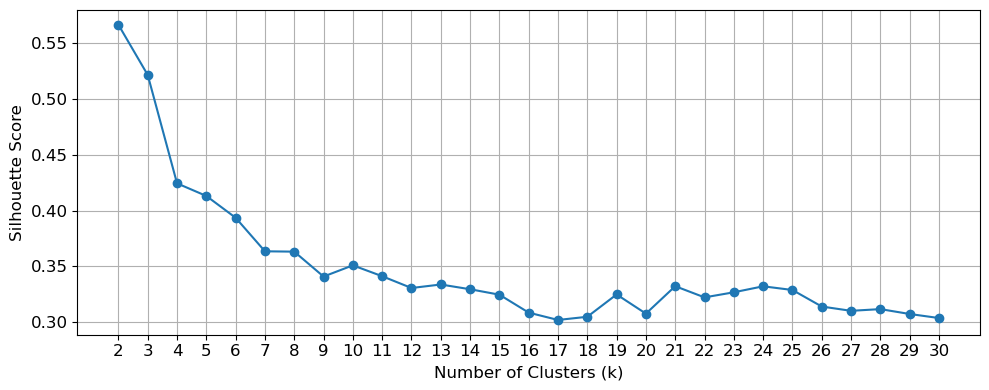

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)',fontsize=12)
plt.ylabel('Silhouette Score',fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(k_values,fontsize=12)
plt.grid(True)
save_fig("Silhouette_Scores_for_Different_k_Values")
plt.show()

### 4. Analyze the Silhouette coefficient for different k values

Saving figure silhouette_analysis_plot


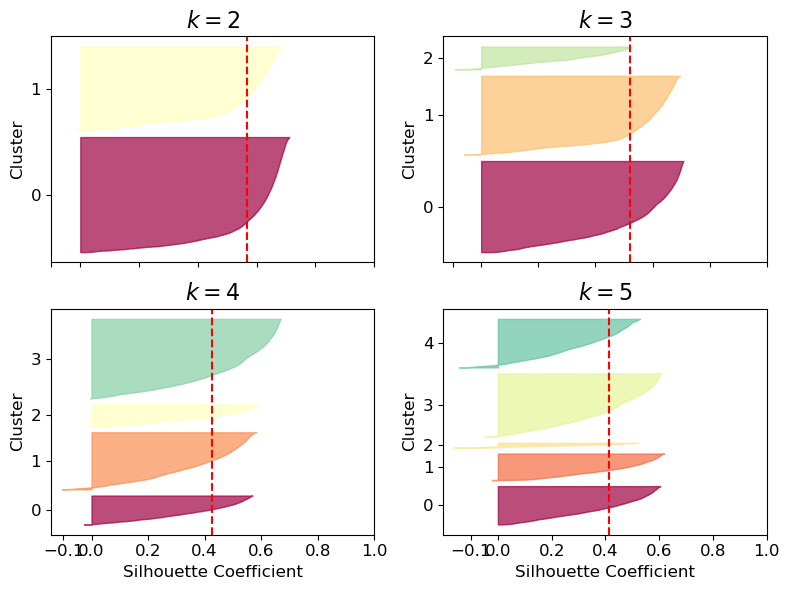

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import silhouette_samples , silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.figure(figsize=(8, 6))

k_values = [KMeans(n_clusters=k, random_state=42).fit(housing_data_selected) for k in range(2, 7)]


for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = k_values[k - 2].labels_
    silhouette_coefficients = silhouette_samples(housing_data_selected, y_pred)

    padding = len(housing_data_selected) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel("Cluster", fontsize=12)
    
    if k in (4, 5):
        plt.xlabel("Silhouette Coefficient", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
    plt.yticks(fontsize=12)
    
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.gca().tick_params(axis='x', labelsize=12)

save_fig("silhouette_analysis_plot")

plt.show()

### 5. Choose the optimal k value

In [22]:
optimal_k = 2

final_pipeline_KMeans = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=optimal_k, random_state=42))
])

final_pipeline_KMeans.fit(housing_data_selected)

housing['cluster'] = final_pipeline_KMeans.predict(housing_data_selected)

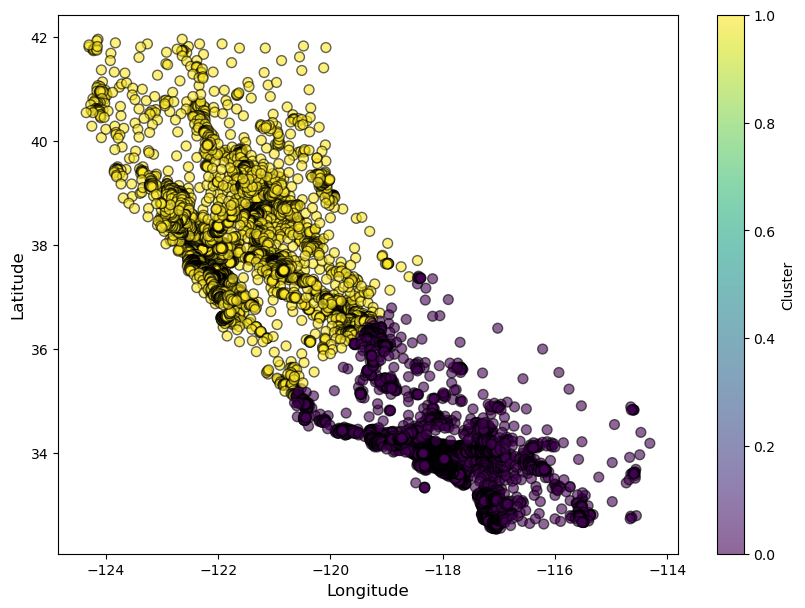

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(housing['longitude'], housing['latitude'], c=housing['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

### 6. Visualize the cluster using scatter plots

Saving figure K-Means_Clustering_on_California_Housing_Dataset


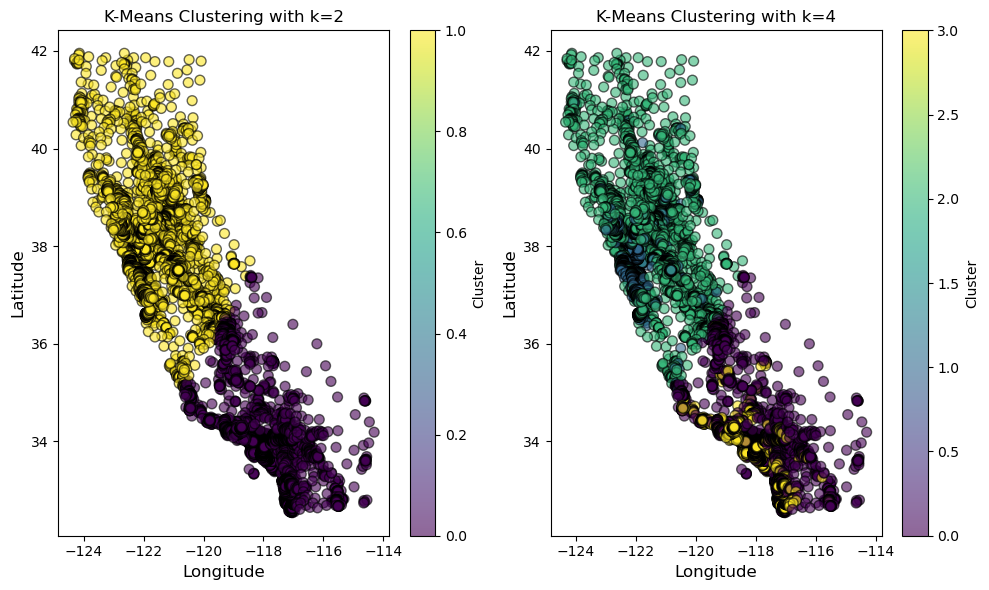

In [24]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pipeline_2 = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=2, random_state=42))
    ])

pipeline_4 = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=4, random_state=42))
    ])

pipeline_2.fit(housing_data_selected)
pipeline_4.fit(housing_data_selected)

housing['cluster2'] = pipeline_2.predict(housing_data_selected)
housing['cluster4'] = pipeline_4.predict(housing_data_selected)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

scatter = axes[0].scatter(housing['longitude'], housing['latitude'], c=housing['cluster2'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
axes[0].set_xlabel("Longitude", fontsize=12)
axes[0].set_ylabel("Latitude", fontsize=12)
axes[0].set_title(f"K-Means Clustering with k={2}", fontsize=12)

fig.colorbar(scatter, ax=axes[0], orientation='vertical', label='Cluster')

scatter = axes[1].scatter(housing['longitude'], housing['latitude'], c=housing['cluster4'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
axes[1].set_xlabel("Longitude", fontsize=12)
axes[1].set_ylabel("Latitude", fontsize=12)
axes[1].set_title(f"K-Means Clustering with k={4}", fontsize=12)

fig.colorbar(scatter, ax=axes[1], orientation='vertical', label='Cluster')

plt.tight_layout()

save_fig("K-Means_Clustering_on_California_Housing_Dataset")

plt.show()


# DBSCAN Clustering algorithm steps

### 1. Creating a pipeline with eps/ min_samples and applying a StandardScaler

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

eps_values = [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1]

min_samples_values = [1, 2, 3, 5, 7, 10, 20, 30]

silhouette_scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('dbscan', DBSCAN(eps=eps, min_samples=min_samples))
        ])
        
        pipeline.fit(housing_data_selected)
        
        cluster_labels = pipeline['dbscan'].labels_
        
        if len(set(cluster_labels)) > 1 and -1 in cluster_labels:
            score = silhouette_score(housing_data_selected, cluster_labels)
            silhouette_scores.append((eps, min_samples, score))
        else:
            silhouette_scores.append((eps, min_samples, None))


### 2. Analyze the Silhouette scores for different eps and min_samples values

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.DataFrame({
    'eps': [eps for eps, min_samples, score in silhouette_scores if score is not None],
    'min_samples': [min_samples for eps, min_samples, score in silhouette_scores if score is not None],
    'silhouette_score': [score for eps, min_samples, score in silhouette_scores if score is not None]
})

heatmap_data = data.pivot(index='min_samples', columns='eps', values='silhouette_score')

### 3. Plot the heatmap for DBSCAN

Saving figure Silhouette_Score_Heatmap_for_DBSCAN


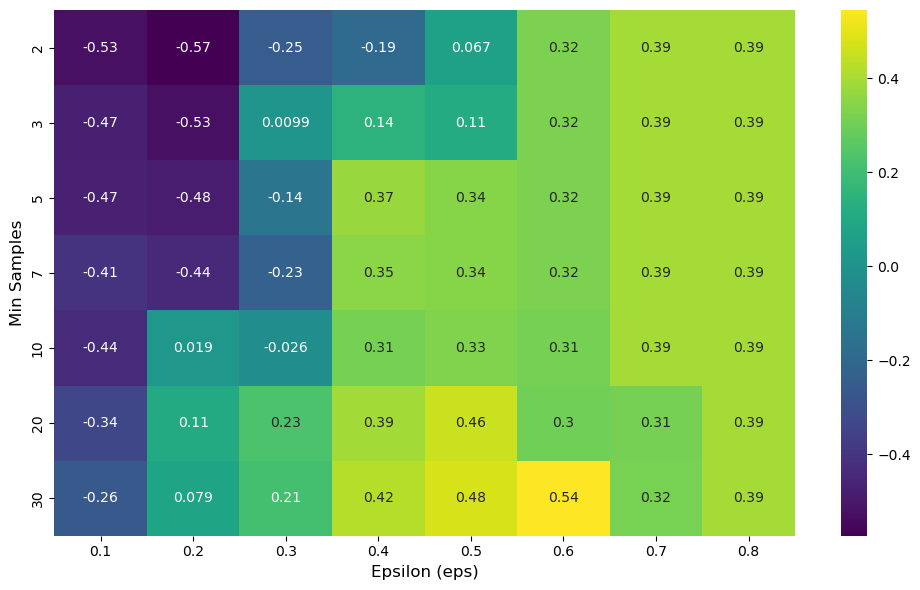

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)
plt.xlabel('Epsilon (eps)', fontsize=12)
plt.ylabel('Min Samples', fontsize=12)
save_fig("Silhouette_Score_Heatmap_for_DBSCAN")
plt.show()

### 4. Visualize the cluster using scatter plots

Saving figure DBSCAN _Clustering_on_California_Housing_Dataset


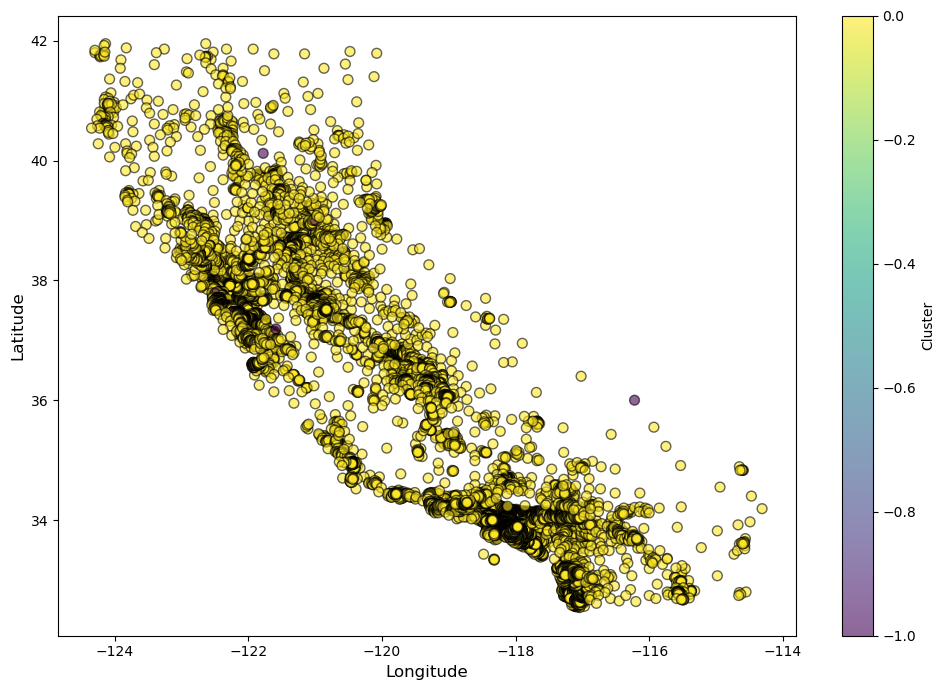

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

final_pipeline_DBSCAN = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.6, min_samples=30))
])

final_pipeline_DBSCAN.fit(housing_data_selected)

housing['cluster_final_DBSCAN'] = final_pipeline_DBSCAN['dbscan'].labels_

plt.figure(figsize=(10, 7))
plt.scatter(housing['longitude'], housing['latitude'], c=housing['cluster_final_DBSCAN'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.colorbar(label='Cluster')
save_fig("DBSCAN _Clustering_on_California_Housing_Dataset")
plt.show()